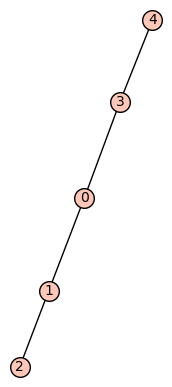

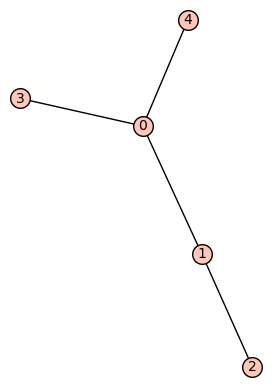

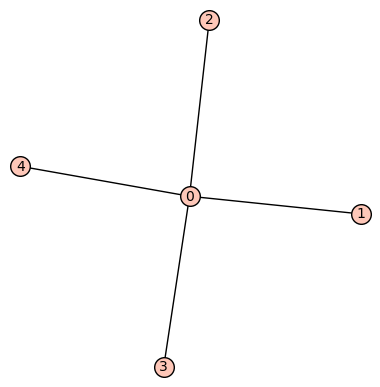

In [92]:
from sage.graphs.trees import TreeIterator
drevo = []
for G in TreeIterator(5):
    if G.is_connected():
        if len(G.cycle_basis('vertex')) == 0:
            drevo.append(G)
            G.show()

In [93]:
def AZIvrednost(graf, alfa): #Izračun AZI vrednost za nek graf, len(graf[u]) nam da dolžino seznama sosedovza vozlišče u, torej je to stopnja vozlišča u
    vsota = 0
    for u in graf:
        for v in graf[u]:
            vsota = vsota + ((len(graf[u]) *len(graf[v]))/(len(graf[u]) + len(graf[v]) - 2))^alfa
    return vsota/2

In [95]:
alfa = -3
AZI_vred = {}
for G in drevo:
    a = AZIvrednost(G, alfa)
    AZI_vred[a] = (G)

27/16


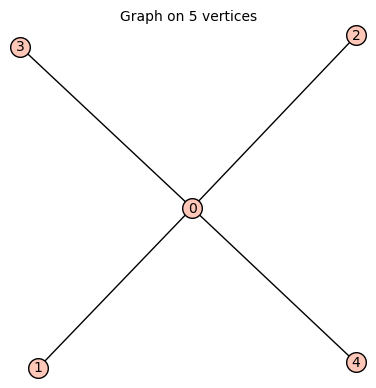

In [97]:
print(max(AZI_vred))
AZI_vred[max(AZI_vred)]

1/2


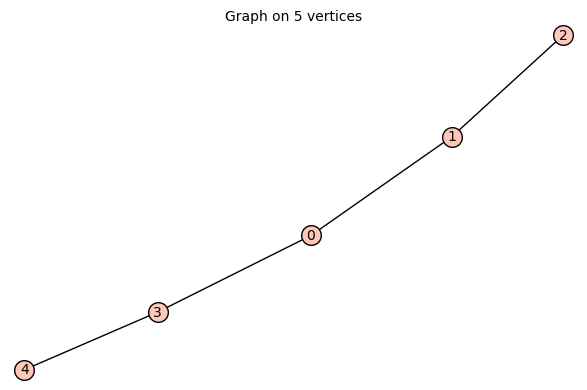

In [98]:
print(min(AZI_vred))
AZI_vred[min(AZI_vred)]

In [99]:
alfa = -1
AZI_vred = {}
for G in drevo:
    a = AZIvrednost(G, alfa)
    AZI_vred[a] = (G)

3


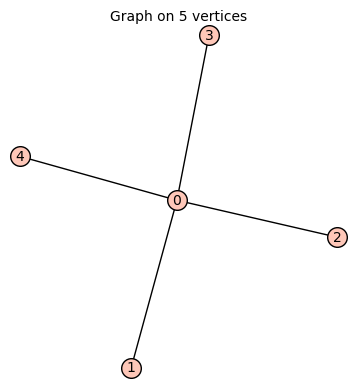

In [100]:
print(max(AZI_vred))
AZI_vred[max(AZI_vred)]

2


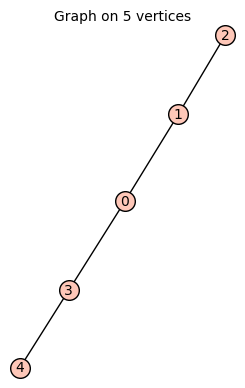

In [101]:
print(min(AZI_vred))
AZI_vred[min(AZI_vred)]

In [102]:
alfa = 0
AZI_vred = {}
for G in drevo:
    a = AZIvrednost(G, alfa)
    AZI_vred[a] = (G)

4


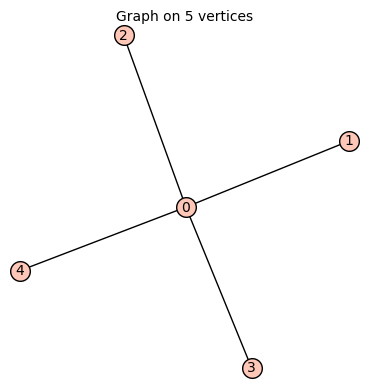

In [103]:
print(max(AZI_vred))
AZI_vred[max(AZI_vred)]

4


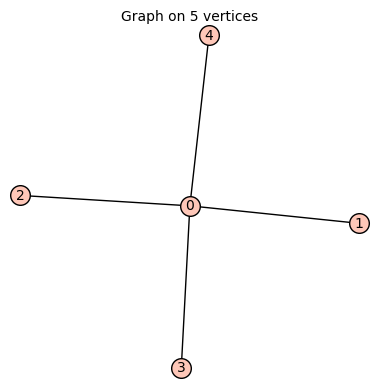

In [104]:
print(min(AZI_vred))
AZI_vred[min(AZI_vred)]

In [105]:
alfa = 1
AZI_vred = {}
for G in drevo:
    a = AZIvrednost(G, alfa)
    AZI_vred[a] = (G)

8


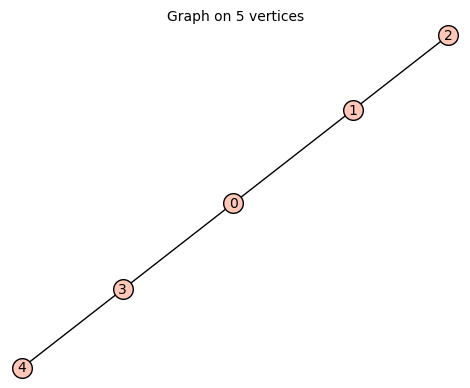

In [106]:
print(max(AZI_vred))
AZI_vred[max(AZI_vred)]

16/3


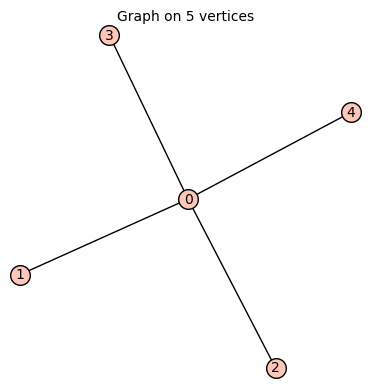

In [107]:
print(min(AZI_vred))
AZI_vred[min(AZI_vred)]

In [108]:
alfa = 3
AZI_vred = {}
for G in drevo:
    a = AZIvrednost(G, alfa)
    AZI_vred[a] = (G)

32


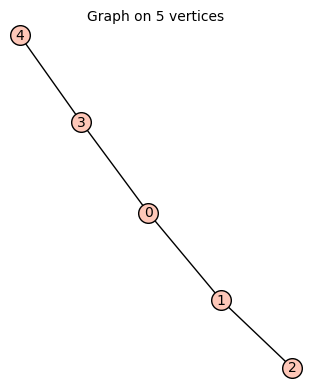

In [109]:
print(max(AZI_vred))
AZI_vred[max(AZI_vred)]

256/27


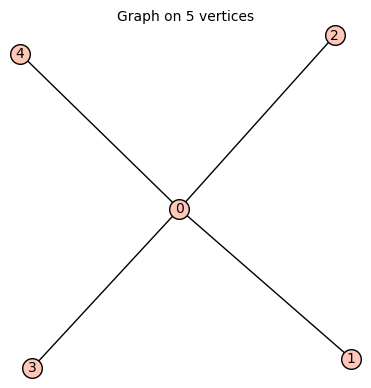

In [110]:
print(min(AZI_vred))
AZI_vred[min(AZI_vred)]

Če primerjamo različne alfa lahko opazimo najprej, da pri alfa = 0 ima graf maksimalno in minimalno AZI vrednost pri istem grafu. Zanimivo je to, da pri alfa z negativnimi vrednostmi ima zvezda maksimalno AZI vrednost, kar je obratno od alfa s pozitivnimi vrednostmi. Opazimo tudi to, da naprimer en graf, ki ima maksimalno AZI vrednost npr pri alfa = -1, isti graf ima minimalno AZI vrednost pri alfa = 1 in tisti graf ki ima pri alfa = -1 minimalno AZI vrednost ima pri alfa = 1 maksimalno AZI vrednost. 

In [111]:
def generiranje_dreves(n):
    A = graphs.RandomTree(n)
    if A.is_connected():
        if len(A.cycle_basis('vertex')) == 0:
            return(A)

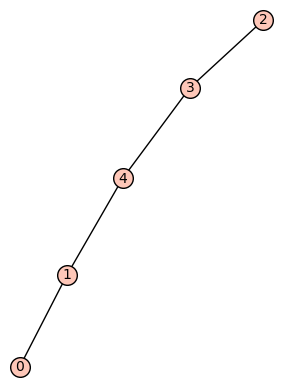

[(0, 1, None), (1, 4, None), (2, 3, None), (3, 4, None)]

In [112]:
B = generiranje_dreves(5)
B.show()
B.edges()

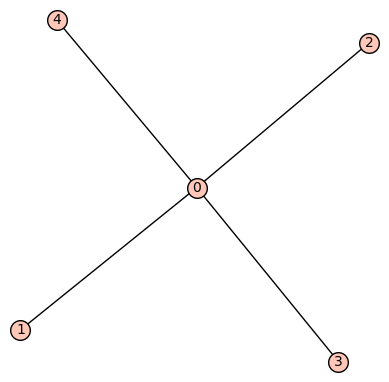

(0, 1, None)
(0, 2, None)
(0, 3, None)
(0, 4, None)


In [113]:
test = Graph({0: [1, 2, 3, 4]})
test.show()
for e in test.edges():
    print(e)

In [114]:
def AZI_max(graf, n=100, tol=10^-9, i=0):
    for e in graf.edges():
        i += 1
        K = graf
        if i > n:
            return(AZIvrednost(K, 3))
        K.delete_edge(e)
        for u in K.vertices():                                  #če odstranimo eno povezavo, potem graf razpade na dva dela, zato moramo dodati drevesno                                                                       povezavo 
                for v in K.vertices():                              #gremo po vseh vozliščih
                    if K.distance(u, v) > n:                        #izberemo vozlišče, ki ga v grafu še ni
                        if u != v:
                            K.add_edge((u, v))                      #to preverimo z funkcijo .distance()
                            if K.is_connected():
                                a = AZIvrednost(K, 3)                  #isti postopek kot zgoraj
                                if (a + tol) > AZIvrednost(graf, 3):
                                    return(AZI_max(K, n, tol, i))
    return(AZIvrednost(graf, 3))

In [115]:
AZI_max(test)

256/27

In [116]:
def AZI_min(graf, n=100, tol=10^-9, i=0):
    for e in graf.edges():
        i += 1
        K = graf
        if i > n:
            return(AZIvrednost(K, 3))
        K.delete_edge(e)
        K.show()
        for u in K.vertices():                                  #če odstranimo eno povezavo graf ni povezan, zato moramo dodati drevesno povezavo 
                for v in K.vertices():                              #gremo po vseh vozliščih
                    if K.distance(u, v) > n:                        #izberemo vozlišče, ki ga v grafu še ni
                        if u != v:
                            K.add_edge((u, v))
                            K.show()   #to preverimo z funkcijo .distance()
                            if K.is_connected():
                                a = AZIvrednost(K, 3)                  #isti postopek kot zgoraj
                                if (a - tol) < AZIvrednost(graf, 3):
                                    return(AZI_min(K, n, tol, i))
    return("prav")

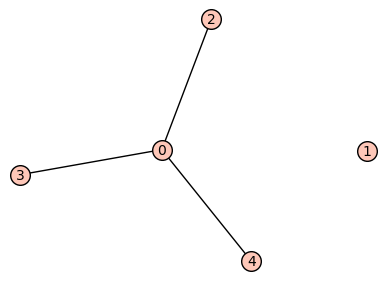

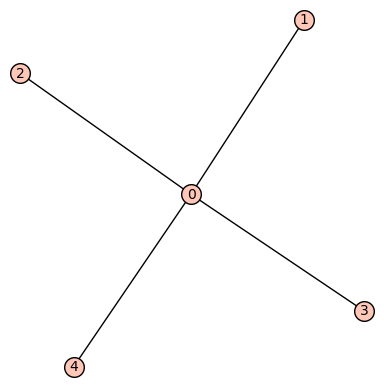

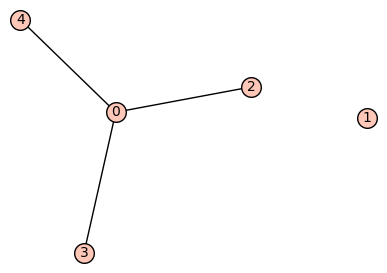

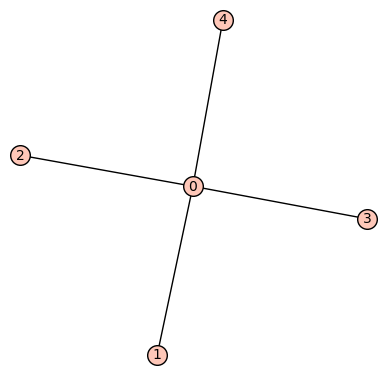

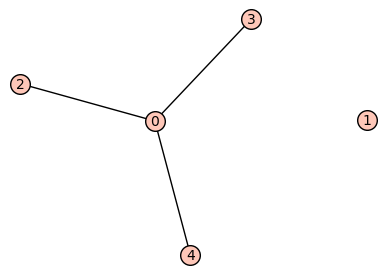

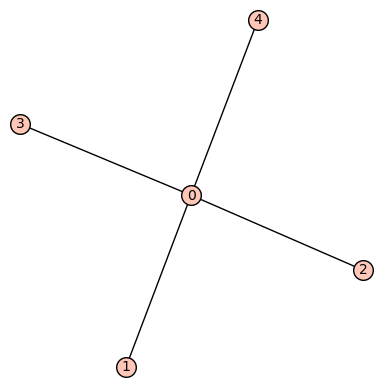

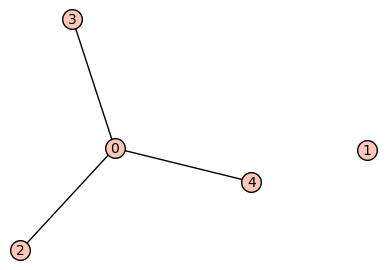

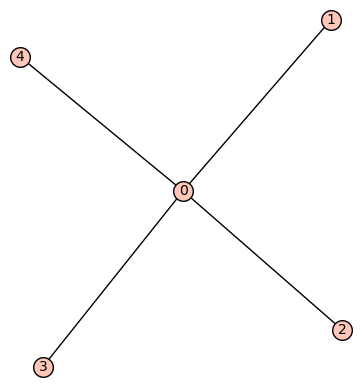

In [118]:
AZI_min(test,5)